# Exploratory Data Analysis (EDA) for COVID-19 Cases Dataset

## Introduction
This notebook is dedicated to performing a comprehensive **Exploratory Data Analysis (EDA)** on a dataset of COVID-19 cases. EDA is a crucial step in the data science and machine learning pipeline, as it helps us uncover insights, identify patterns, and prepare the data for predictive modeling.

In this analysis, we aim to:
1. Understand the structure and quality of the dataset.
2. Handle missing values and assess their impact.
3. Identify key trends, relationships, and distributions within the data.
4. Generate visualizations to gain deeper insights into the temporal and geographical aspects of COVID-19 cases.
5. Prepare the dataset for downstream tasks, including machine learning model development.

By the end of this notebook, we will have a clean and well-understood dataset that can be used to predict future trends in COVID-19 cases.

---

## Dataset Overview
The dataset contains information about COVID-19 cases, including reported cases, recoveries, and deaths, along with demographic and temporal data. The dataset has a significant proportion of missing values, which will be addressed during the EDA process.

---

## Key Questions to Address
- What is the overall structure of the dataset?
- How do missing values impact the analysis, and how can they be handled?
- Are there temporal trends or seasonal effects in the reported cases?
- What are the most significant predictors of case numbers?

---

## Notebook Outline
1. **Data Loading and Overview**: Importing the dataset and examining its structure.
2. **Data Cleaning**: Handling missing values, duplicates, and outliers.
3. **Univariate Analysis**: Exploring the distribution of individual variables.
4. **Bivariate and Multivariate Analysis**: Analyzing relationships between variables.
5. **Visualizing Trends**: Creating plots to observe trends and patterns.
6. **Data Preparation**: Preparing the dataset for machine learning.
---

## Python Library needed

In [416]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import scipy.stats as stats

## 1. **Data Loading and Overview**

In [5]:
csv_file = r'..\Covid_19_raw_data\Covid-19_Raw_Dataset.csv'
# converting data into a Pandas Dataframe
data = pd.read_csv(csv_file)

db_name = "Covid-19_Raw_Dataset.sqlite"
conn = sqlite3.connect(db_name)

table_name = "Covid_Data"
#Cinverting data into a SQLite file
data.to_sql(table_name, conn, if_exists='replace', index=False)

conn.close()

print(f"CSV data has been successfully converted and saved as {db_name}")

CSV data has been successfully converted and saved as Covid-19_Raw_Dataset.sqlite


In [6]:
data

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,40578846.0,62.215546,16.752,NaN,1516.2733,NaN,10.9,48.214695,0.39,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154255,Germany,2021-09-28,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.6250,0.243796,6.9,NaN,8.00,0.950
154256,Germany,2021-09-29,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.6250,0.243796,6.9,NaN,8.00,0.950
154257,Germany,2021-09-30,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.6250,0.243796,6.9,NaN,8.00,0.950
154258,Germany,2021-10-01,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.6250,0.243796,6.9,NaN,8.00,0.950


---
#### *Summary Information*

In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154260 entries, 0 to 154259
Data columns (total 61 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   country                                     154260 non-null  object 
 1   date                                        154260 non-null  object 
 2   total_cases                                 152444 non-null  float64
 3   new_cases                                   151868 non-null  float64
 4   new_cases_smoothed                          151463 non-null  float64
 5   total_cases_per_million                     152444 non-null  float64
 6   new_cases_per_million                       151868 non-null  float64
 7   new_cases_smoothed_per_million              151463 non-null  float64
 8   total_deaths                                152444 non-null  float64
 9   new_deaths                                  151880 non-null  float64
 

---
#### *Shape of the Dataset*

In [10]:
print(f"Dataset has {data.shape[0]} rows and {data.shape[1]} columns.")

Dataset has 154260 rows and 61 columns.


---
#### *Check for Missing Values*

In [12]:
print(data.isnull().sum())

country                           0
date                              0
total_cases                    1816
new_cases                      2392
new_cases_smoothed             2797
                              ...  
extreme_poverty               62026
diabetes_prevalence           19914
handwashing_facilities        82821
hospital_beds_per_thousand    60197
human_development_index       27236
Length: 61, dtype: int64


---
#### *Column Data Types*

In [14]:
print(data.dtypes)

country                        object
date                           object
total_cases                   float64
new_cases                     float64
new_cases_smoothed            float64
                               ...   
extreme_poverty               float64
diabetes_prevalence           float64
handwashing_facilities        float64
hospital_beds_per_thousand    float64
human_development_index       float64
Length: 61, dtype: object


---
#### *Unique Values in Each Column*

In [16]:
print(data.nunique())

country                          86
date                           1833
total_cases                   57061
new_cases                     13748
new_cases_smoothed            23677
                              ...  
extreme_poverty                  49
diabetes_prevalence              50
handwashing_facilities           39
hospital_beds_per_thousand       47
human_development_index          68
Length: 61, dtype: int64


---
#### *Value Counts for Specific Columns*

In [18]:
print(data['country'].value_counts())

country
Afghanistan                        1832
Cambodia                           1832
Denmark                            1832
Democratic Republic of Congo       1832
Czechia                            1832
                                   ... 
Bonaire Sint Eustatius and Saba    1829
Cook Islands                       1829
England                            1359
Germany                             641
England & Wales                     261
Name: count, Length: 86, dtype: int64


In [19]:
print(data['date'].value_counts())

date
2021-07-25    86
2020-10-18    86
2021-09-12    86
2020-09-27    86
2021-05-23    86
              ..
2025-01-02    83
2020-01-01    65
2020-01-02    65
2020-01-03    65
2021-1         1
Name: count, Length: 1833, dtype: int64


---
#### *Identify Duplicates*

In [21]:
print(f"Number of duplicate rows: {data.duplicated().sum()}")

Number of duplicate rows: 0


---
#### *Data Types Summary*

In [23]:
print(data.dtypes.value_counts())

float64    57
object      4
Name: count, dtype: int64


---
#### *Summary Statistics*

In [25]:
print(data.describe())

        total_cases     new_cases  new_cases_smoothed  \
count  1.524440e+05  1.518680e+05        1.514630e+05   
mean   8.343643e+06  8.022230e+03        8.043822e+03   
std    3.725136e+07  1.022718e+05        8.442937e+04   
min    0.000000e+00  0.000000e+00        0.000000e+00   
25%    9.475000e+03  0.000000e+00        0.000000e+00   
50%    7.070900e+04  0.000000e+00        1.057143e+01   
75%    6.966140e+05  1.060000e+02        2.470000e+02   
max    3.015464e+08  7.213802e+06        6.109825e+06   

       total_cases_per_million  new_cases_per_million  \
count            152444.000000          151868.000000   
mean             121692.663775             112.157000   
std              173107.873274             963.200151   
min                   0.000000               0.000000   
25%                2988.456800               0.000000   
50%               34573.112000               0.000000   
75%              172831.600000              14.541522   
max              769510.300000

<div class="alert alert-block alert-info">
<b>Calculate:</b> Ratio of non-null values to the total number of rows for each column
</div>

In [27]:
non_null_ratio = data.notnull().sum() / len(data)
print(non_null_ratio * 100)

country                       100.000000
date                          100.000000
total_cases                    98.822767
new_cases                      98.449371
new_cases_smoothed             98.186827
                                 ...    
extreme_poverty                59.791262
diabetes_prevalence            87.090626
handwashing_facilities         46.310774
hospital_beds_per_thousand     60.976922
human_development_index        82.344094
Length: 61, dtype: float64


<div class="alert alert-block alert-danger">
Columns with more than '50%' <b>NULL</b> values
</div>

In [29]:
null_ratio = data.isnull().sum() / len(data)

columns_more_than_50_nulls = null_ratio[null_ratio > 0.5].index

print(f"Columns with more than 50% null values: [{len(columns_more_than_50_nulls.tolist())}")
print(columns_more_than_50_nulls.tolist())

Columns with more than 50% null values: [37
['excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundre

In [66]:
nulls_per_country = data.isnull().groupby(data['country']).sum()

nulls_per_country['Total_Nulls'] = nulls_per_country.sum(axis=1)

print(nulls_per_country[['Total_Nulls']].sort_values(by='Total_Nulls', ascending=False))

                                 Total_Nulls
country                                     
Asia excl. China                       85983
Falkland Islands                       76538
Bonaire Sint Eustatius and Saba        76248
French Guiana                          76002
American Samoa                         75009
...                                      ...
Canada                                 37847
Belgium                                36694
Czechia                                29823
England & Wales                        15399
Germany                                13792

[86 rows x 1 columns]


In [117]:
total_columns = data.shape[1] - 1

null_percentage_per_country = (data.isnull().groupby(data['country']).sum() / total_columns) * 100

null_percentage_per_country['Total_Null_Percentage'] = (data.isnull().groupby(data['country']).sum().sum(axis=1) / (total_columns * total_columns) * 100)

print(null_percentage_per_country.sort_values(by='Total_Null_Percentage', ascending=False))

                                 country  date  total_cases   new_cases  \
country                                                                   
Asia excl. China                     0.0   0.0     0.000000    0.000000   
Falkland Islands                     0.0   0.0     0.000000    0.000000   
Bonaire Sint Eustatius and Saba      0.0   0.0     0.000000    0.000000   
French Guiana                        0.0   0.0     0.000000    0.000000   
American Samoa                       0.0   0.0     0.000000    0.000000   
...                                  ...   ...          ...         ...   
Canada                               0.0   0.0     5.000000    6.666667   
Belgium                              0.0   0.0     5.000000    5.000000   
Czechia                              0.0   0.0     5.000000    5.000000   
England & Wales                      0.0   0.0   435.000000  435.000000   
Germany                              0.0   0.0     6.666667    6.666667   

                        

In [119]:
total_columns = data.shape[1] - 1 

total_rows_per_country = data.groupby('country').size()

null_percentage_per_country = (data.isnull().groupby(data['country']).sum().sum(axis=1) / (total_rows_per_country * total_columns) * 100)

null_percentage_df = null_percentage_per_country.reset_index()
null_percentage_df.columns = ['Country', 'Null_Percentage']

null_percentage_df = null_percentage_df.sort_values(by='Null_Percentage', ascending=False)

print(null_percentage_df)

                            Country  Null_Percentage
67                  England & Wales        98.333333
66                          England        88.845965
13                 Asia excl. China        78.351558
75                 Falkland Islands        69.744851
28  Bonaire Sint Eustatius and Saba        69.480590
..                              ...              ...
85                          Germany        35.860634
70                          Estonia        34.667940
39                           Canada        34.431405
22                          Belgium        33.382460
56                          Czechia        27.131550

[86 rows x 2 columns]


In [127]:
total_columns = data.shape[1] - 1  

total_rows_per_country = data.groupby('country').size()

null_percentage_per_country = (data.isnull().groupby(data['country']).sum().sum(axis=1) /(total_rows_per_country * total_columns) * 100)

null_percentage_df = null_percentage_per_country.reset_index()
null_percentage_df.columns = ['Country', 'Null_Percentage']

null_percentage_df = null_percentage_df.sort_values(by='Null_Percentage', ascending=False)

countries_above_50 = null_percentage_df[null_percentage_df['Null_Percentage'] > 50].shape[0]

print(f"Number of countries with null percentage above 50%: {countries_above_50}")

Number of countries with null percentage above 50%: 58


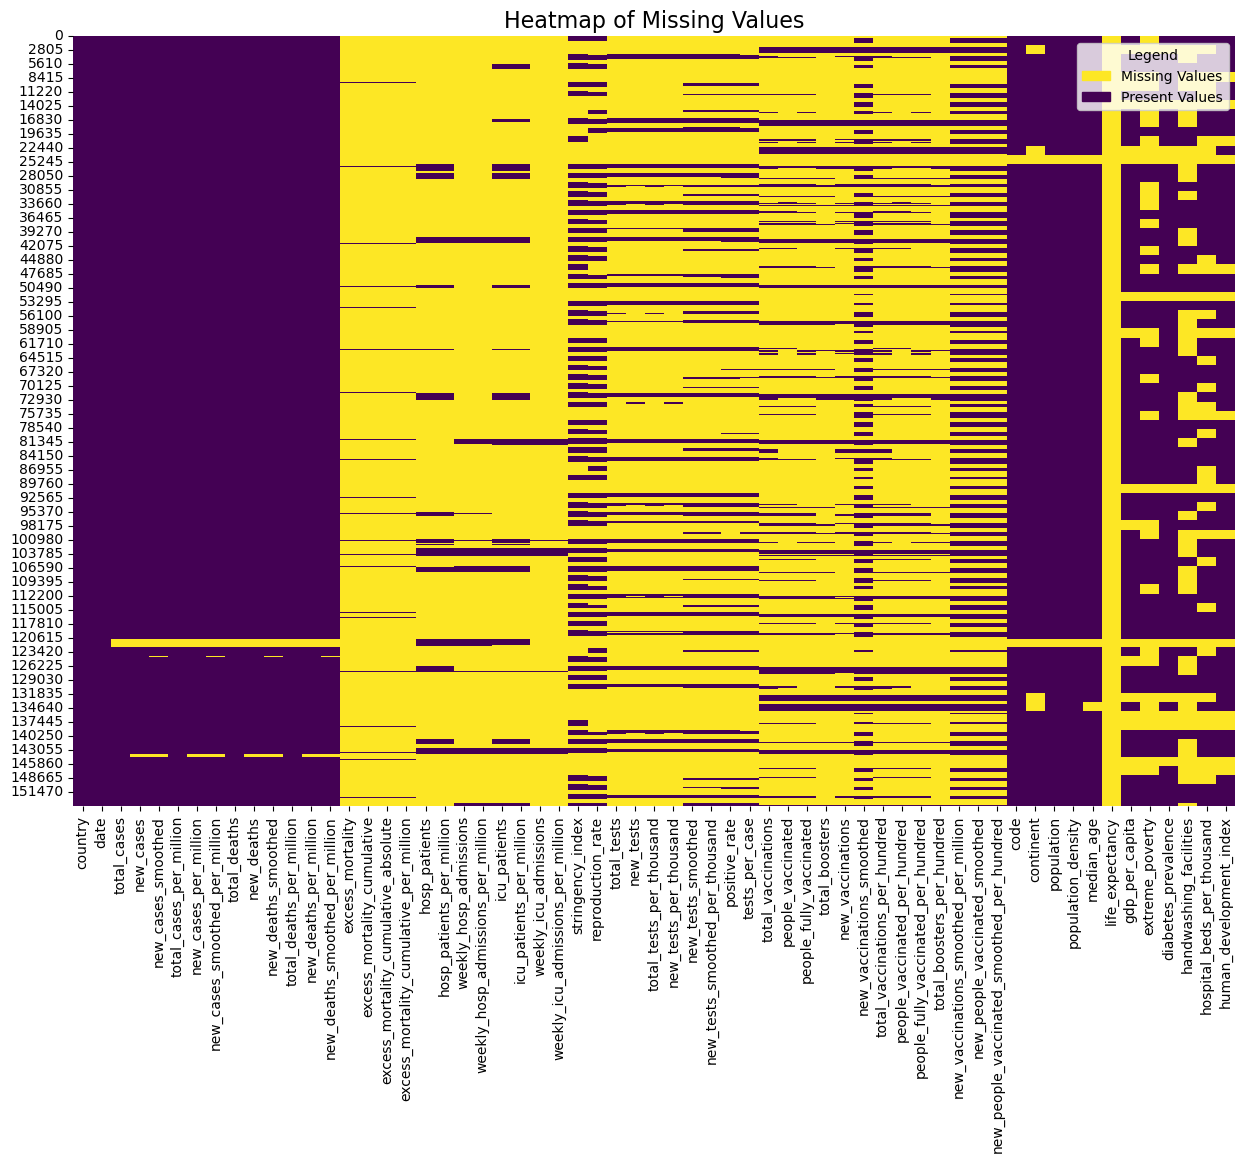

In [30]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=16)

missing_color = sns.color_palette("viridis", as_cmap=True)(1.0)
present_color = sns.color_palette("viridis", as_cmap=True)(0.0) 

missing_patch = mpatches.Patch(color=missing_color, label="Missing Values")
present_patch = mpatches.Patch(color=present_color, label="Present Values")

plt.legend(handles=[missing_patch, present_patch], loc='upper right', title="Legend")

plt.show()

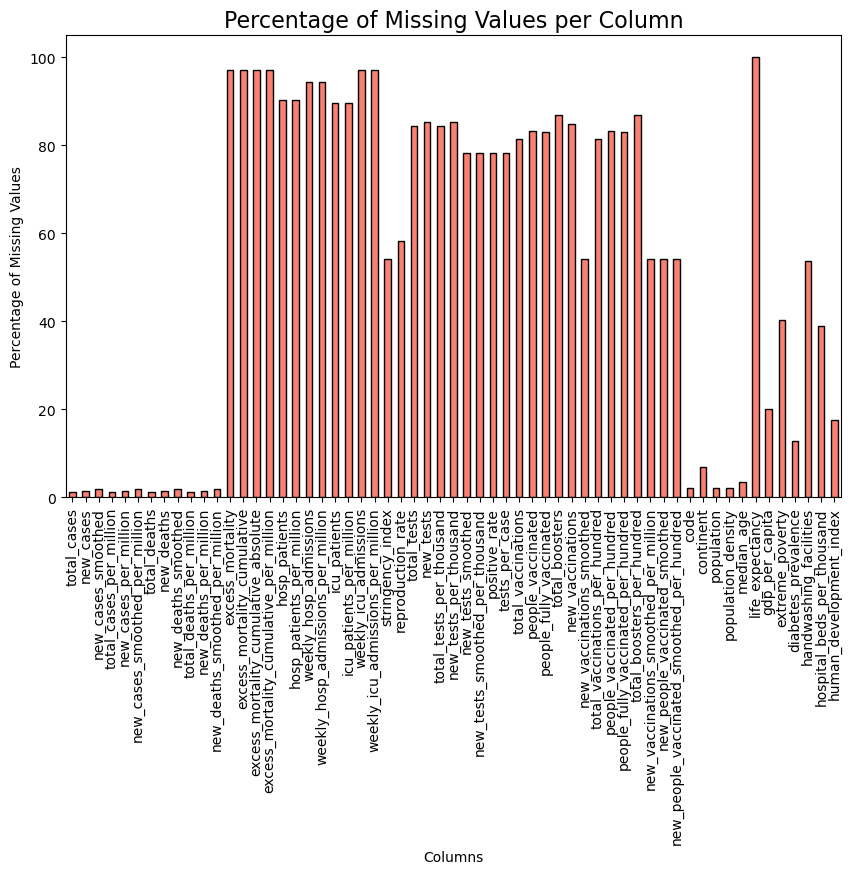

In [31]:
null_percentage = (data.isnull().sum() / len(data)) * 100
columns_with_nulls = null_percentage[null_percentage > 0]  # Only columns with nulls

plt.figure(figsize=(10, 6))
columns_with_nulls.plot(kind='bar', color='salmon', edgecolor='black')
plt.title("Percentage of Missing Values per Column", fontsize=16)
plt.ylabel("Percentage of Missing Values")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

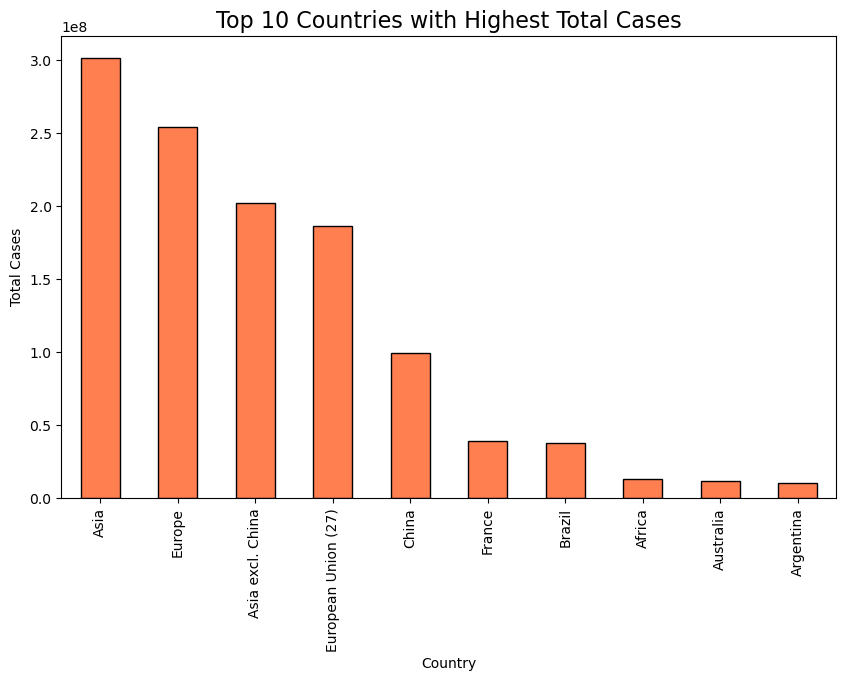

In [51]:
top_countries = data.groupby('country')['total_cases'].max().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', figsize=(10, 6), color='coral', edgecolor='black')
plt.title("Top 10 Countries with Highest Total Cases", fontsize=16)
plt.ylabel("Total Cases")
plt.xlabel("Country")
plt.show()

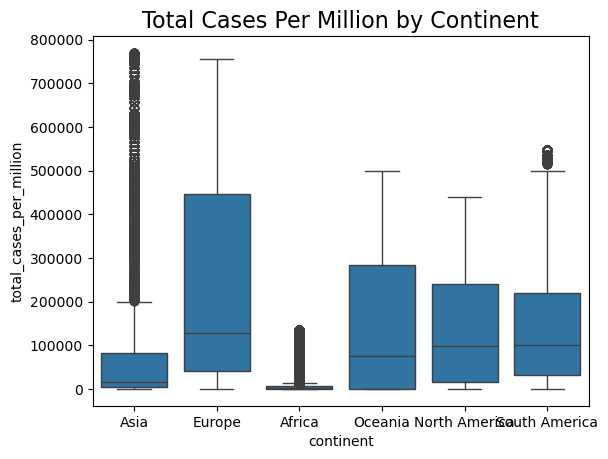

In [58]:
sns.boxplot(data=data, x='continent', y='total_cases_per_million')
plt.title("Total Cases Per Million by Continent", fontsize=16)
plt.show()

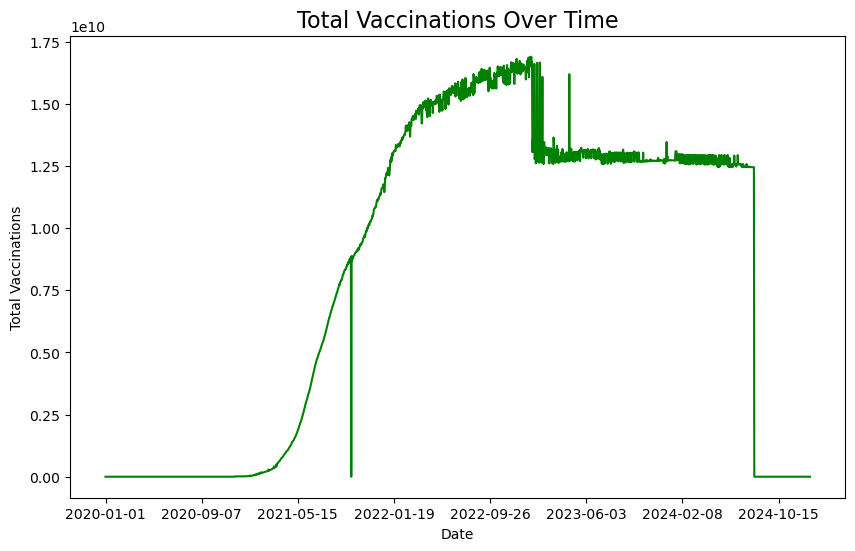

In [60]:
vacc_data = data.groupby('date')['total_vaccinations'].sum()
vacc_data.plot(kind='line', figsize=(10, 6), color='green')
plt.title("Total Vaccinations Over Time", fontsize=16)
plt.ylabel("Total Vaccinations")
plt.xlabel("Date")
plt.show()

In [342]:
null_percentage = data.isnull().mean() * 100

columns_to_drop = null_percentage[null_percentage > 50].index

data_cleaned = data.drop(columns=columns_to_drop)

print(f"Columns removed (more than 50% nulls): {list(columns_to_drop)}")
print(f"Shape of dataset after removal: {data_cleaned.shape}")

Columns removed (more than 50% nulls): ['excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', '

In [344]:
data_cleaned

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,code,continent,population,population_density,median_age,gdp_per_capita,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154255,Germany,2021-09-28,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950
154256,Germany,2021-09-29,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950
154257,Germany,2021-09-30,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950
154258,Germany,2021-10-01,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950


In [346]:
print(data_cleaned.isnull().sum())

country                                0
date                                   0
total_cases                         1816
new_cases                           2392
new_cases_smoothed                  2797
total_cases_per_million             1816
new_cases_per_million               2392
new_cases_smoothed_per_million      2797
total_deaths                        1816
new_deaths                          2380
new_deaths_smoothed                 2789
total_deaths_per_million            1816
new_deaths_per_million              2380
new_deaths_smoothed_per_million     2789
code                                3450
continent                          10766
population                          3450
population_density                  3450
median_age                          5279
gdp_per_capita                     30897
extreme_poverty                    62026
diabetes_prevalence                19914
hospital_beds_per_thousand         60197
human_development_index            27236
dtype: int64


In [348]:
total_rows_per_country = data_cleaned.groupby('country').size()
null_percentage_per_country = (data_cleaned.isnull().groupby(data_cleaned['country']).sum().sum(axis=1) /(total_rows_per_country * total_columns) * 100)

countries_to_keep = null_percentage_per_country[null_percentage_per_country < 50].index

data_cleaned = data_cleaned[data_cleaned['country'].isin(countries_to_keep)]

print(f"Shape of dataset after removing countries with ≥50% nulls: {data_cleaned.shape}")

Shape of dataset after removing countries with ≥50% nulls: (154260, 24)


In [350]:
data_cleaned

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,code,continent,population,population_density,median_age,gdp_per_capita,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand,human_development_index
0,Afghanistan,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
1,Afghanistan,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
2,Afghanistan,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
3,Afghanistan,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
4,Afghanistan,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,AFG,Asia,40578846.0,62.215546,16.752,1516.2733,NaN,10.9,0.39,0.462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154255,Germany,2021-09-28,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950
154256,Germany,2021-09-29,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950
154257,Germany,2021-09-30,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950
154258,Germany,2021-10-01,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.6250,0.243796,6.9,8.00,0.950


In [352]:
total_columns = data.shape[1] - 1  

total_rows_per_country = data.groupby('country').size()

null_percentage_per_country = (data.isnull().groupby(data['country']).sum().sum(axis=1) /(total_rows_per_country * total_columns) * 100)

null_percentage_df = null_percentage_per_country.reset_index()
null_percentage_df.columns = ['Country', 'Null_Percentage']

countries_to_keep = null_percentage_df[null_percentage_df['Null_Percentage'] <= 50]['Country']

filtered_data = data[data['country'].isin(countries_to_keep)]

filtered_data

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,population,population_density,median_age,life_expectancy,gdp_per_capita,extreme_poverty,diabetes_prevalence,handwashing_facilities,hospital_beds_per_thousand,human_development_index
3661,Albania,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2827615.0,103.197624,35.943,NaN,15492.067,0.021277,10.2,NaN,2.89,0.789
3662,Albania,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2827615.0,103.197624,35.943,NaN,15492.067,0.021277,10.2,NaN,2.89,0.789
3663,Albania,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2827615.0,103.197624,35.943,NaN,15492.067,0.021277,10.2,NaN,2.89,0.789
3664,Albania,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,2827615.0,103.197624,35.943,NaN,15492.067,0.021277,10.2,NaN,2.89,0.789
3665,Albania,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,2827615.0,103.197624,35.943,NaN,15492.067,0.021277,10.2,NaN,2.89,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154255,Germany,2021-09-28,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.625,0.243796,6.9,NaN,8.00,0.950
154256,Germany,2021-09-29,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.625,0.243796,6.9,NaN,8.00,0.950
154257,Germany,2021-09-30,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.625,0.243796,6.9,NaN,8.00,0.950
154258,Germany,2021-10-01,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,84086228.0,240.665820,45.024,NaN,53969.625,0.243796,6.9,NaN,8.00,0.950


In [354]:
non_null_ratio = filtered_data.notnull().sum() / len(filtered_data)
print(non_null_ratio * 100)

country                       100.000000
date                          100.000000
total_cases                    99.836334
new_cases                      98.712626
new_cases_smoothed             98.437188
                                 ...    
extreme_poverty                89.028382
diabetes_prevalence            99.998004
handwashing_facilities         40.215959
hospital_beds_per_thousand     99.998004
human_development_index        99.998004
Length: 61, dtype: float64


In [356]:
null_percentage_columns = filtered_data.isnull().mean() * 100

final_cleaned_data = filtered_data.drop(columns=columns_to_drop)

print(f"Columns removed (more than 50% nulls): {list(columns_to_drop)}")
print(f"Shape of dataset after removing columns: {final_cleaned_data.shape}")

final_cleaned_data

Columns removed (more than 50% nulls): ['excess_mortality', 'excess_mortality_cumulative', 'excess_mortality_cumulative_absolute', 'excess_mortality_cumulative_per_million', 'hosp_patients', 'hosp_patients_per_million', 'weekly_hosp_admissions', 'weekly_hosp_admissions_per_million', 'icu_patients', 'icu_patients_per_million', 'weekly_icu_admissions', 'weekly_icu_admissions_per_million', 'stringency_index', 'reproduction_rate', 'total_tests', 'new_tests', 'total_tests_per_thousand', 'new_tests_per_thousand', 'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'positive_rate', 'tests_per_case', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'new_vaccinations', 'new_vaccinations_smoothed', 'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'total_boosters_per_hundred', 'new_vaccinations_smoothed_per_million', 'new_people_vaccinated_smoothed', 'new_people_vaccinated_smoothed_per_hundred', '

,country,date,total_cases,new_cases,new_cases_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths,new_deaths,...,code,continent,population,population_density,median_age,gdp_per_capita,extreme_poverty,diabetes_prevalence,hospital_beds_per_thousand,human_development_index
3661,Albania,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ALB,Europe,2827615.0,103.197624,35.943,15492.067,0.021277,10.2,2.89,0.789
3662,Albania,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ALB,Europe,2827615.0,103.197624,35.943,15492.067,0.021277,10.2,2.89,0.789
3663,Albania,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,ALB,Europe,2827615.0,103.197624,35.943,15492.067,0.021277,10.2,2.89,0.789
3664,Albania,2020-01-04,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,ALB,Europe,2827615.0,103.197624,35.943,15492.067,0.021277,10.2,2.89,0.789
3665,Albania,2020-01-05,0.0,0.0,NaN,0.000,0.0,NaN,0.0,0.0,...,ALB,Europe,2827615.0,103.197624,35.943,15492.067,0.021277,10.2,2.89,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154255,Germany,2021-09-28,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.625,0.243796,6.9,8.00,0.950
154256,Germany,2021-09-29,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.625,0.243796,6.9,8.00,0.950
154257,Germany,2021-09-30,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.625,0.243796,6.9,8.00,0.950
154258,Germany,2021-10-01,4202003.0,0.0,7660.4287,49972.547,0.0,91.10206,95454.0,0.0,...,DEU,Europe,84086228.0,240.665820,45.024,53969.625,0.243796,6.9,8.00,0.950


In [358]:
null_counts = final_cleaned_data.isnull().sum()

columns_with_nulls = null_counts[null_counts > 0]

print(", \n".join([f"{col}: {count}" for col, count in columns_with_nulls.items()]))

total_cases: 82, 
new_cases: 645, 
new_cases_smoothed: 783, 
total_cases_per_million: 82, 
new_cases_per_million: 645, 
new_cases_smoothed_per_million: 783, 
total_deaths: 82, 
new_deaths: 640, 
new_deaths_smoothed: 775, 
total_deaths_per_million: 82, 
new_deaths_per_million: 640, 
new_deaths_smoothed_per_million: 775, 
code: 1, 
continent: 1, 
population: 1, 
population_density: 1, 
median_age: 1, 
gdp_per_capita: 1833, 
extreme_poverty: 5497, 
diabetes_prevalence: 1, 
hospital_beds_per_thousand: 1, 
human_development_index: 1


In [360]:
columns_to_drop = [col for col in final_cleaned_data.columns if 'smoothed' in col or '_per_' in col]
final_cleaned_data = final_cleaned_data.drop(columns=columns_to_drop)
final_cleaned_data = final_cleaned_data.drop(index=154259)
final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,median_age,extreme_poverty,diabetes_prevalence,human_development_index
3661,Albania,2020-01-01,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,35.943,0.021277,10.2,0.789
3662,Albania,2020-01-02,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,35.943,0.021277,10.2,0.789
3663,Albania,2020-01-03,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,35.943,0.021277,10.2,0.789
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,35.943,0.021277,10.2,0.789
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,35.943,0.021277,10.2,0.789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,45.024,0.243796,6.9,0.950
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,45.024,0.243796,6.9,0.950
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,45.024,0.243796,6.9,0.950
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,45.024,0.243796,6.9,0.950


In [362]:
final_cleaned_data['stringency_index'] = filtered_data['stringency_index']
final_cleaned_data['reproduction_rate'] = filtered_data['reproduction_rate']
final_cleaned_data['total_tests'] = filtered_data['total_tests']
final_cleaned_data['new_tests'] = filtered_data['new_tests']
final_cleaned_data['positive_rate'] = filtered_data['positive_rate']
final_cleaned_data['new_vaccinations'] = filtered_data['new_vaccinations']
final_cleaned_data['total_vaccinations'] = filtered_data['total_vaccinations']
final_cleaned_data['people_vaccinated'] = filtered_data['people_vaccinated']
final_cleaned_data['people_fully_vaccinated'] = filtered_data['people_fully_vaccinated']
final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,Albania,2020-01-02,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,Albania,2020-01-03,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.9882,NaN,NaN,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.0005,NaN,NaN,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.0160,NaN,NaN,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.0263,NaN,NaN,5.759878,233180.0,109890980.0,57553644.0,53577750.0


In [364]:
print(final_cleaned_data.isnull().sum())

country                        0
date                           0
total_cases                   81
new_cases                    644
total_deaths                  81
new_deaths                   639
code                           0
continent                      0
population                     0
population_density             0
median_age                     0
extreme_poverty             5496
diabetes_prevalence            0
human_development_index        0
stringency_index           20965
reproduction_rate          22004
total_tests                30322
new_tests                  31063
positive_rate              28064
new_vaccinations           35586
total_vaccinations         33613
people_vaccinated          35509
people_fully_vaccinated    34889
dtype: int64


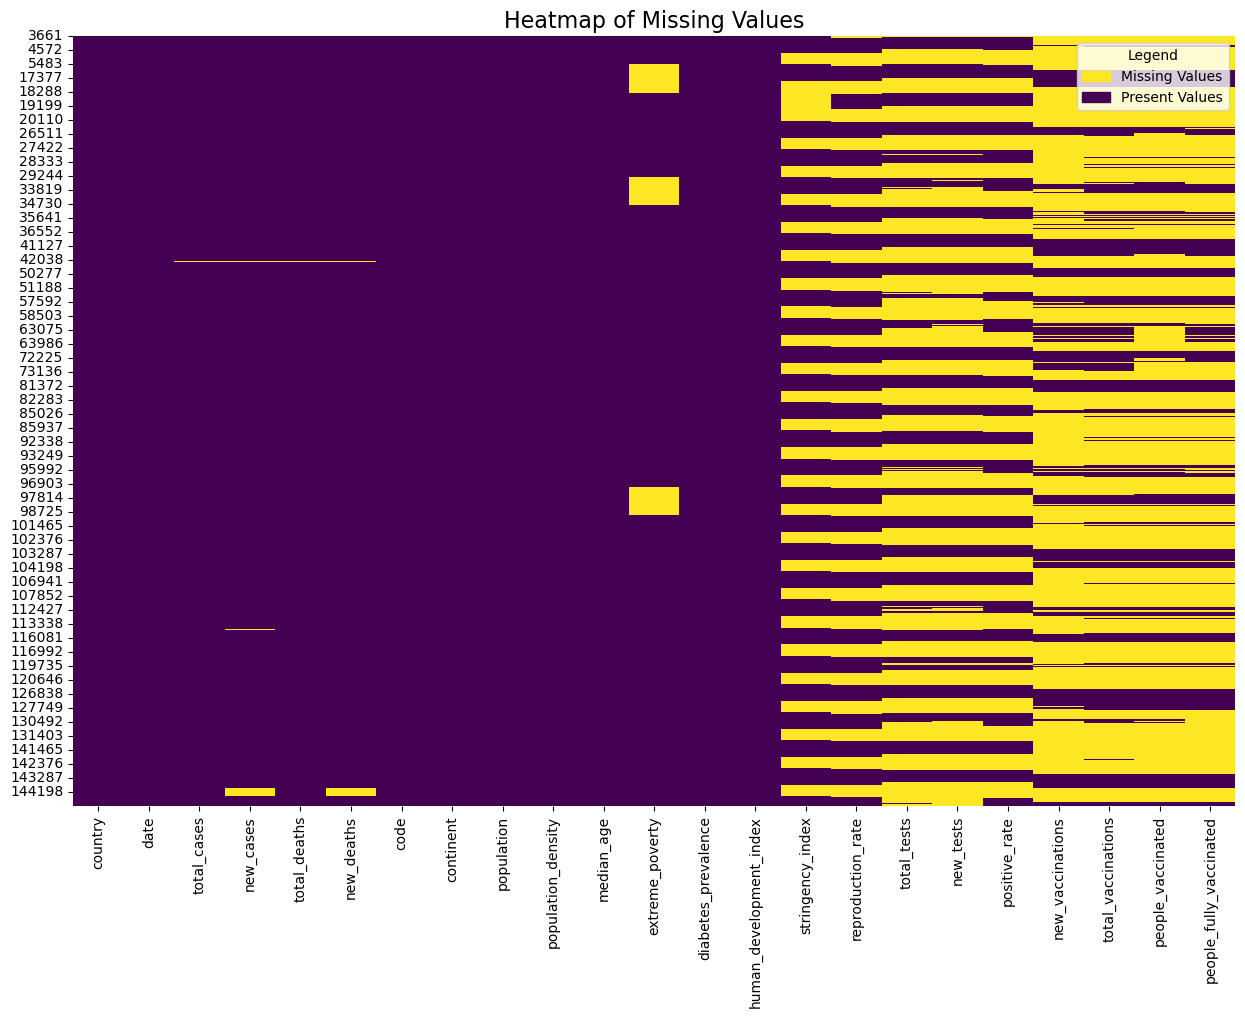

In [366]:
plt.figure(figsize=(15, 10))
sns.heatmap(final_cleaned_data.isnull(), cbar=False, cmap="viridis")
plt.title("Heatmap of Missing Values", fontsize=16)

missing_color = sns.color_palette("viridis", as_cmap=True)(1.0)
present_color = sns.color_palette("viridis", as_cmap=True)(0.0) 

missing_patch = mpatches.Patch(color=missing_color, label="Missing Values")
present_patch = mpatches.Patch(color=present_color, label="Present Values")

plt.legend(handles=[missing_patch, present_patch], loc='upper right', title="Legend")

plt.show()

In [368]:
final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3662,Albania,2020-01-02,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3663,Albania,2020-01-03,NaN,NaN,NaN,NaN,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.9882,NaN,NaN,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.0005,NaN,NaN,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.0160,NaN,NaN,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.0263,NaN,NaN,5.759878,233180.0,109890980.0,57553644.0,53577750.0


In [298]:
final_cleaned_data.to_csv("cleaned_data.csv", index=False)

print(f"Cleaned dataset saved to 'cleaned_data.csv'")

Cleaned dataset saved to 'cleaned_data.csv'


In [370]:
Imputed_Columns = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'stringency_index', 'total_tests', 'new_tests', 'positive_rate', 'new_vaccinations', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']
unique_contries = final_cleaned_data['country'].unique()
country_list = unique_contries.tolist()

for country in country_list:
    # Filter the data for the current country
    temp = final_cleaned_data[final_cleaned_data['country'] == country]
    
    # Loop through each column in the list of imputed columns
    for column in Imputed_Columns:
        # Iterate through rows in the column
        for idx in temp.index:
            if pd.isnull(temp.at[idx, column]):  # Check if the value is null
                temp.at[idx, column] = 0  # Replace with 0
            else:
                break  # Stop when the first non-null value is encountered
    
    # Update the main DataFrame with the cleaned data for the current country
    final_cleaned_data.loc[temp.index] = temp

final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3662,Albania,2020-01-02,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3663,Albania,2020-01-03,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.9882,NaN,0.0,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.0005,NaN,0.0,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.0160,NaN,0.0,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.0263,NaN,0.0,5.759878,233180.0,109890980.0,57553644.0,53577750.0


In [394]:
non_null_ratio = final_cleaned_data.notnull().sum() / len(final_cleaned_data)
print(non_null_ratio * 100)

country                    100.000000
date                       100.000000
total_cases                100.000000
new_cases                  100.000000
total_deaths               100.000000
new_deaths                 100.000000
code                       100.000000
continent                  100.000000
population                 100.000000
population_density         100.000000
median_age                 100.000000
extreme_poverty            100.000000
diabetes_prevalence        100.000000
human_development_index    100.000000
stringency_index           100.000000
reproduction_rate          100.000000
total_tests                 43.687751
new_tests                   43.500130
positive_rate               48.635756
new_vaccinations            63.160416
total_vaccinations          54.459991
people_vaccinated           50.685615
people_fully_vaccinated     53.254426
dtype: float64


In [429]:
final_cleaned_data.to_csv("cleaned_data_v2.csv", index=False)

print(f"Cleaned dataset saved to 'cleaned_data.csv'")

Cleaned dataset saved to 'cleaned_data.csv'


In [374]:
final_cleaned_data['new_cases'] = final_cleaned_data['total_cases'] - final_cleaned_data['total_cases'].shift(1)
final_cleaned_data['new_cases'] = final_cleaned_data['new_cases'].fillna(0)

final_cleaned_data['new_deaths'] = final_cleaned_data['total_deaths'] - final_cleaned_data['total_deaths'].shift(1)
final_cleaned_data['new_deaths'] = final_cleaned_data['new_deaths'].fillna(0)

In [376]:
final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3662,Albania,2020-01-02,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3663,Albania,2020-01-03,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.9882,NaN,0.0,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.0005,NaN,0.0,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.0160,NaN,0.0,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.0263,NaN,0.0,5.759878,233180.0,109890980.0,57553644.0,53577750.0


In [378]:
final_cleaned_data.loc[final_cleaned_data['country'] == 'Argentina', 'extreme_poverty'] = 0.6235474
final_cleaned_data.loc[final_cleaned_data['country'] == 'Bahrain', 'extreme_poverty'] = 0.0
final_cleaned_data.loc[final_cleaned_data['country'] == 'Cuba', 'extreme_poverty'] = 2.754781
final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3662,Albania,2020-01-02,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3663,Albania,2020-01-03,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.9882,NaN,0.0,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.0005,NaN,0.0,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.0160,NaN,0.0,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.0263,NaN,0.0,5.759878,233180.0,109890980.0,57553644.0,53577750.0


In [386]:
for country in country_list:
    # Filter the data for the current country
    temp = final_cleaned_data[final_cleaned_data['country'] == country]
    
    # Reverse the index to go from bottom to top
    reversed_index = temp.index[::-1]
    for idx in reversed_index:
        if pd.isnull(temp.at[idx, 'stringency_index']):
            temp.at[idx, 'stringency_index'] = 0  # Replace with 0
        else:
            break  # Stop replacing when a non-NaN value is found
    
    # Update the main DataFrame with the cleaned data for the current country
    final_cleaned_data.loc[temp.index] = temp

final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3662,Albania,2020-01-02,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3663,Albania,2020-01-03,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,NaN,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.9882,NaN,0.0,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.0005,NaN,0.0,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.0160,NaN,0.0,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.0263,NaN,0.0,5.759878,233180.0,109890980.0,57553644.0,53577750.0


In [473]:
data_test = final_cleaned_data['reproduction_rate'].dropna()
# Kolmogorov-Smirnov Test
stat, p = stats.kstest(data_test, 'norm', args=(data_test.mean(), data_test.std()))
print(f"Kolmogorov-Smirnov Test: Statistic={stat}, p-value={p}")
if p > 0.05:
    print("Data is normally distributed (Kolmogorov-Smirnov Test).")
else:
    print("Data is not normally distributed (Kolmogorov-Smirnov Test).")

Kolmogorov-Smirnov Test: Statistic=0.03775615909378627, p-value=1.7209546255867436e-62
Data is normally distributed (Kolmogorov-Smirnov Test).


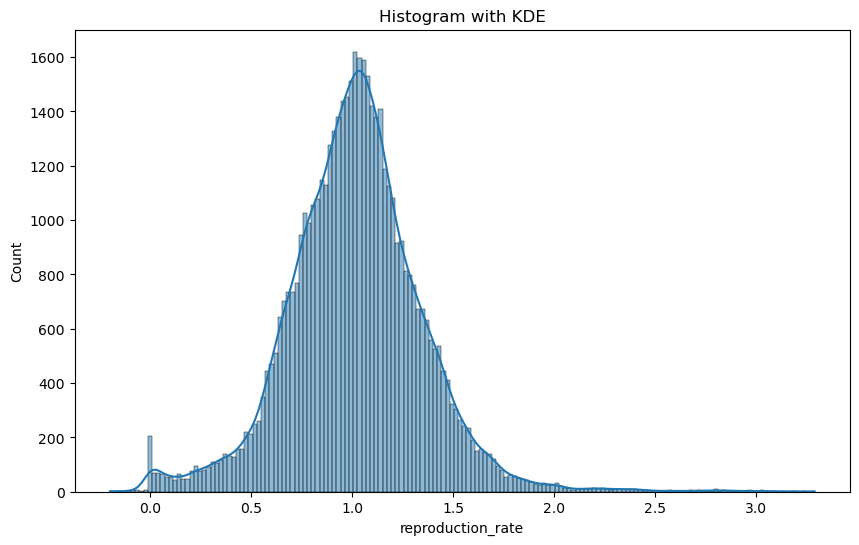

In [441]:
plt.figure(figsize=(10, 6))
sns.histplot(data_test, kde=True)
plt.title("Histogram with KDE")
plt.show()

In [404]:
mean = final_cleaned_data['reproduction_rate'].mean()
std = final_cleaned_data['reproduction_rate'].std()

num_nulls = final_cleaned_data['reproduction_rate'].isna().sum()
random_values = np.random.normal(loc=mean, scale=std, size=num_nulls)

final_cleaned_data.loc[final_cleaned_data['reproduction_rate'].isna(), 'reproduction_rate'] = random_values
final_cleaned_data

,country,date,total_cases,new_cases,total_deaths,new_deaths,code,continent,population,population_density,...,human_development_index,stringency_index,reproduction_rate,total_tests,new_tests,positive_rate,new_vaccinations,total_vaccinations,people_vaccinated,people_fully_vaccinated
3661,Albania,2020-01-01,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,1.486581,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3662,Albania,2020-01-02,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,1.426557,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3663,Albania,2020-01-03,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,1.017413,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3664,Albania,2020-01-04,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,0.673032,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3665,Albania,2020-01-05,0.0,0.0,0.0,0.0,ALB,Europe,2827615.0,103.197624,...,0.789,0.00,0.895956,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154254,Germany,2021-09-27,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.35,0.988200,NaN,0.0,6.079413,148824.0,109137600.0,57313984.0,53209456.0
154255,Germany,2021-09-28,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.32,1.000500,NaN,0.0,5.975609,251790.0,109389390.0,57395970.0,53331096.0
154256,Germany,2021-09-29,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.29,1.016000,NaN,0.0,5.869102,268404.0,109657790.0,57478424.0,53460236.0
154257,Germany,2021-09-30,4202003.0,0.0,95454.0,0.0,DEU,Europe,84086228.0,240.665820,...,0.950,35.25,1.026300,NaN,0.0,5.759878,233180.0,109890980.0,57553644.0,53577750.0
